In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, transpile
from qiskit.test.mock import FakeJakarta
import qiskit
import numpy as np

In [2]:
qr_a = QuantumRegister(2, 'a')
qr_b = QuantumRegister(2, 'b')
qr_c = QuantumRegister(1, 'c')
qr_s = QuantumRegister(1, 's')
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr_a, qr_b, qr_c, qr_s,cr)

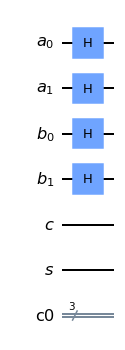

In [3]:
qc.h(qr_a[0:2])
qc.h(qr_b[0:2])
#qc.x(qr_a[0])
#qc.x(qr_a[1])
#qc.x(qr_b[0])
#qc.x(qr_b[1])
qc.draw('mpl')

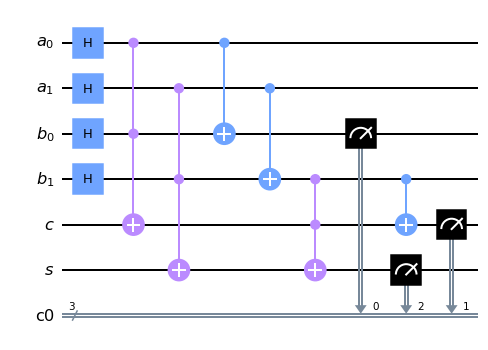

In [4]:
qc.ccx(qr_a[0], qr_b[0], qr_c)
qc.cx(qr_a[0], qr_b[0])
qc.ccx(qr_a[1], qr_b[1], qr_s)
qc.cx(qr_a[1], qr_b[1])
qc.ccx(qr_b[1], qr_c, qr_s)
qc.cx(qr_b[1], qr_c)

qc.measure(qr_b[0],cr[0])
qc.measure(qr_c,1)
qc.measure(qr_s,2)

qc.draw('mpl')

In [5]:
from qiskit.test.mock import FakeJakarta
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram


In [6]:
IBMQ.save_account('5523d6cfad74e00bdc073a06caf29e56212014a07ef2b4569ddab4c057fd724d1a323537724076360ae26f9c20677a44de4c35c8e7a6242a8a10941e1105d4fc')
#IBMQ.load_account()
IBMQ.load_account()
backend = FakeJakarta()

configrc.store_credentials:WARNING:2022-06-29 02:46:14,739: Credentials already present. Set overwrite=True to overwrite.


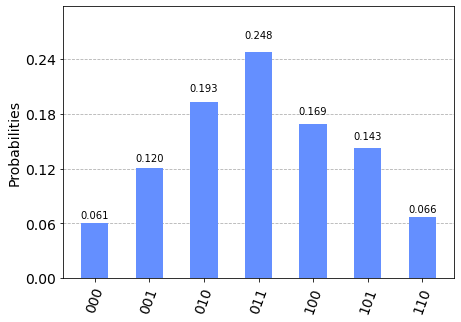

In [7]:
sim_ideal = AerSimulator()
result = sim_ideal.run(transpile(qc, sim_ideal)).result()
count = result.get_counts()
# qc_trans = transpile(qc, sim)
# count = sim.run(qc_trans).result().get_counts()
plot_histogram(count)